In [1]:
import FSRmsg_pb2
import numpy as np
import matplotlib.pyplot as plt
import os

data c length: 131
data d length: 130
data q length: 130
data n length: 129
data w length: 115


Text(0.5, 0.98, 'Noise')

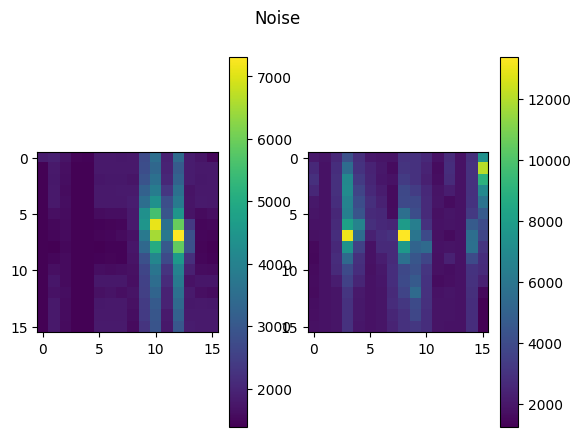

In [4]:
# Read the FSR data
fsrmsg_c = FSRmsg_pb2.FSRMsg()
fsrmsg_d = FSRmsg_pb2.FSRMsg()
fsrmsg_q = FSRmsg_pb2.FSRMsg()
fsrmsg_n = FSRmsg_pb2.FSRMsg()
fsrmsg_w = FSRmsg_pb2.FSRMsg()
f_folder_c = 'fsrdata_C_black'
f_folder_d = 'fsrdata_D_green'
f_folder_q = 'fsrdata_Q_black'
f_folder_n = 'fsrdata_noise_down'
f_folder_w = 'fsrdata_w_black'
read_folder_c = '../data/' + f_folder_c  + '.bin'
read_folder_d = '../data/' + f_folder_d  + '.bin'
read_folder_q = '../data/' + f_folder_q  + '.bin'
read_folder_n = '../data/' + f_folder_n  + '.bin'
read_folder_w = '../data/' + f_folder_w  + '.bin'
with open(read_folder_c, "rb") as f:
    fsrmsg_c.ParseFromString(f.read())
with open(read_folder_d, "rb") as f:
    fsrmsg_d.ParseFromString(f.read())
with open(read_folder_q, "rb") as f:
    fsrmsg_q.ParseFromString(f.read())
with open(read_folder_n, "rb") as f:
    fsrmsg_n.ParseFromString(f.read())
with open(read_folder_w, "rb") as f:
    fsrmsg_w.ParseFromString(f.read())
print('data c length:', len(fsrmsg_c.fsr_data))
print('data d length:', len(fsrmsg_d.fsr_data))
print('data q length:', len(fsrmsg_q.fsr_data))
print('data n length:', len(fsrmsg_n.fsr_data))
print('data w length:', len(fsrmsg_w.fsr_data))

layer1 = np.zeros((16, 16))
layer2 = np.zeros((16, 16))

for i in range(len(fsrmsg_n.fsr_data)):
    data = fsrmsg_n.fsr_data[i]
    value = data.value
    ts = data.timestamp
    fsr_data = np.fromstring(value, dtype=int, sep=' ')
    fsr_data = fsr_data.reshape(16, 32)
    layer1 += fsr_data[:, 0:16]
    layer2 += fsr_data[:, 16:]
mean_layer1 = layer1/len(fsrmsg_n.fsr_data)
mean_layer2 = layer2/len(fsrmsg_n.fsr_data)
fig, axs = plt.subplots(1, 2)
pcm = axs[0].imshow(layer1, cmap='viridis', interpolation='none')
fig.colorbar(pcm, ax=axs[0])
pcm = axs[1].imshow(layer2, cmap='viridis', interpolation='none')
fig.colorbar(pcm, ax=axs[1])
# plt.title('Noise')
fig.suptitle('Noise')


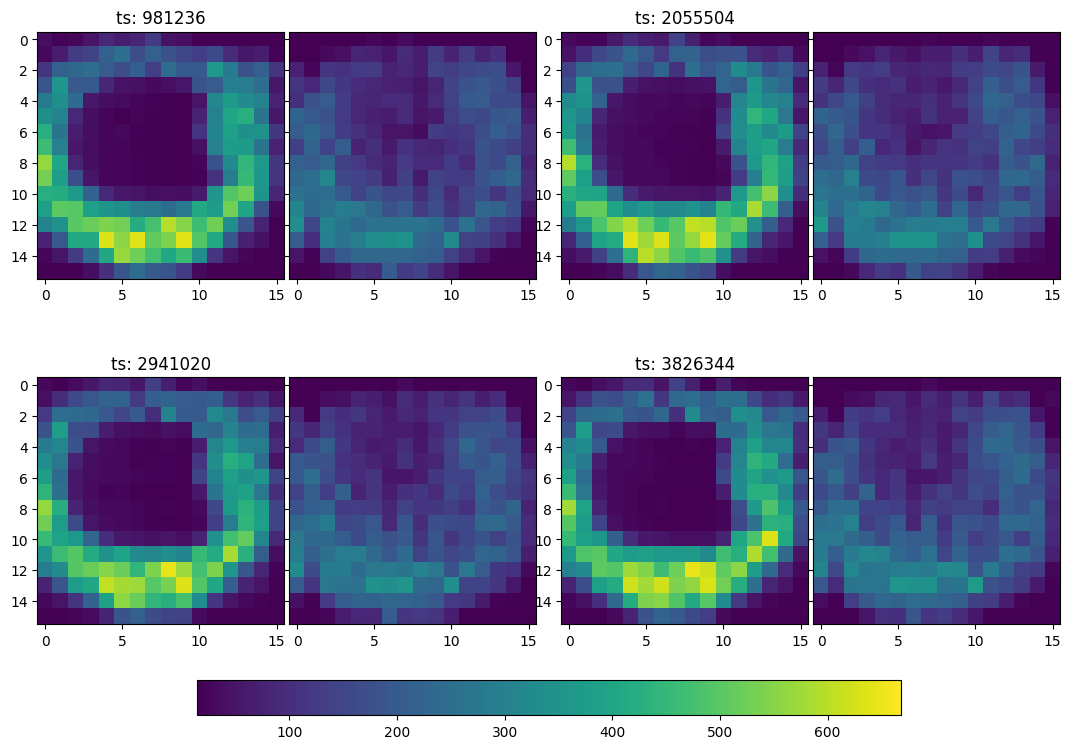

In [162]:
# visualize the data according to the timestamp
from mpl_toolkits.axes_grid1 import make_axes_locatable
ts_bins = [30, 60, 90, 120]
fig, axs = plt.subplots(2, 2, figsize=(11, 8))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

for ts_bin, ax in zip(ts_bins, axs.flat):
    data = fsrmsg_q.fsr_data[ts_bin]
    value = data.value
    ts = data.timestamp
    fsr_data = np.fromstring(value, dtype=int, sep=' ')
    min_val = np.min(fsr_data)
    max_val = np.max(fsr_data)
    fsr_data = fsr_data.reshape(16, 32)
    layer_1 = fsr_data[:, 0:16] - mean_layer1
    layer_2 = fsr_data[:, 16:] - mean_layer2
    divider = make_axes_locatable(ax)
    ax2 = divider.append_axes("right", size="100%", pad=0.05)
    fig1 = ax.get_figure()
    fig1.add_axes(ax2)

    im = ax.imshow(layer_1, cmap='viridis', interpolation='none', vmin=min_val, vmax=max_val)
    im2 = ax2.imshow(layer_2, cmap='viridis', interpolation='none', vmin=min_val, vmax=max_val)
    ax2.yaxis.set_tick_params(labelleft=False)
    # print(fsr_data[0, :, :])
    ax.set_title('ts: ' + str(ts))
fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.05)
# plt.title('FSR data')


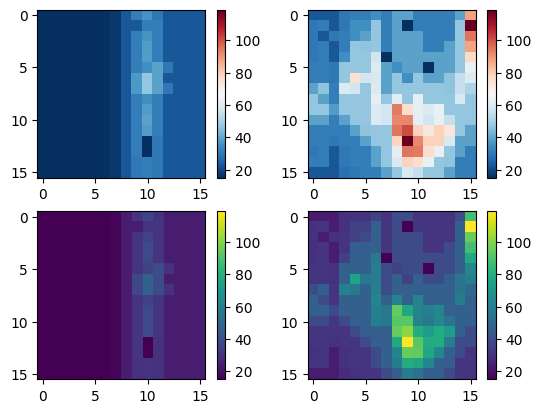

In [146]:
fig, axs = plt.subplots(2, 2)
cm = ['RdBu_r', 'viridis']
data = fsrmsg_n.fsr_data[90]
value = data.value
ts = data.timestamp
fsr_data = np.fromstring(value, dtype=int, sep=' ')
min_val = np.min(fsr_data)
max_val = np.max(fsr_data)
fsr_data = fsr_data.reshape(16, 32)
layer_1 = fsr_data[:, 0:16]
layer_2 = fsr_data[:, 16:]
layers = [layer_1, layer_2]
for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        pcm = ax.imshow(layers[col], cmap=cm[row], interpolation='none', vmin=min_val, vmax=max_val)
        fig.colorbar(pcm, ax=ax)
plt.show()

In [108]:
# extract the data from the message
fsrmsg = FSRmsg_pb2.FSRMsg()
f_folder= 'fsrdataD'
new_folder = '../data/' + f_folder
read_folder = '../data/' + f_folder  + '.bin'
with open(read_folder, "rb") as f:
    fsrmsg_c.ParseFromString(f.read())
if not os.path.exists(new_folder):
    os.makedirs(new_folder)
for i in range(len(fsrmsg.fsr_data)):
    data = fsrmsg.fsr_data[i]
    value = data.value
    ts = data.timestamp
    # print(ts)
    value = value.replace(']', ' ')
    value = value.replace('[', ' ')
    fsr_data = np.fromstring(value, dtype=int, sep=' ')
    fsr_data = fsr_data.reshape(2, 16, 16)
    plt.imshow(fsr_data[1, :, :], cmap='viridis', interpolation=None)
    filename_1 = new_folder + '/' + f_folder + '1_' + '{0:04d}'.format(i) + '.png'
    plt.imshow(fsr_data[0, :, :], cmap='viridis', interpolation=None)
    filename_0 = new_folder + '/' + f_folder + '0_' + '{0:04d}'.format(i) + '.png'
    plt.savefig(filename_1)
    plt.savefig(filename_0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/fsrdataD.bin'

In [83]:
import glob
import cv2
file_list1 = glob.glob("../data/fsrdataD/fsrdataD1_*.png")
file_list1.sort()
file_list0 = glob.glob("../data/fsrdataD/fsrdataD0_*.png")
file_list0.sort()
if len(file_list1) != len(file_list0):
    print('error')
for i in range(len(file_list1)):
    img0 = cv2.imread(file_list0[i])
    img1 = cv2.imread(file_list1[i])
    cv2.imshow('layer_0', img0)
    cv2.imshow('layer_1', img1)
    cv2.waitKey(0)

In [ ]:
x = 